# FASHION MNIST 

![image](https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp)

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

import tensorflow as tf

#### Dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

#### Train/Test Split

In [3]:
(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()

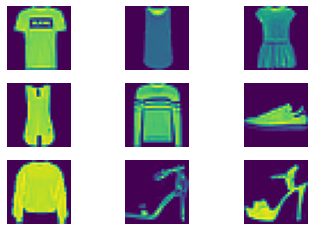

In [4]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.axis("off")
    plt.imshow(x_train[i])

* We can normalizing 

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

#### Deep Learning Model Training

In [6]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [7]:
## We write model. This model save. 

In [8]:
'''
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(units = 128, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(units = 64, kernel_initializer = "uniform", activation = "relu"))
model.add(Dense(units = 10, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(x_train, y_train, epochs = 20)
model.save("fashion.models")

'''

'\nmodel = tf.keras.models.Sequential()\nmodel.add(Flatten(input_shape = (28, 28)))\nmodel.add(Dense(units = 128, kernel_initializer = "uniform", activation = "relu"))\nmodel.add(Dense(units = 64, kernel_initializer = "uniform", activation = "relu"))\nmodel.add(Dense(units = 10, kernel_initializer = "uniform", activation = "sigmoid"))\n\nmodel.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])\n\nmodel.fit(x_train, y_train, epochs = 20)\nmodel.save("fashion.models")\n\n'

In [9]:
model = tf.keras.models.load_model("fashion.models")

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)

print("loss: ", loss)
print("accuracy: ", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3742 - accuracy: 0.8857
loss:  0.37424811720848083
accuracy:  0.885699987411499


* loss:  0.37424811720848083
* accuracy:  0.885699987411499

In [11]:
label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

### The images we want to predict.

In [12]:
import os

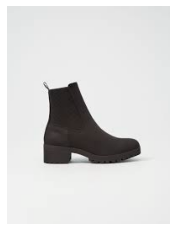

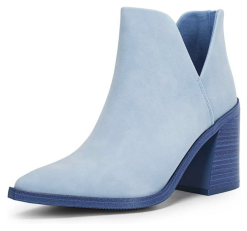

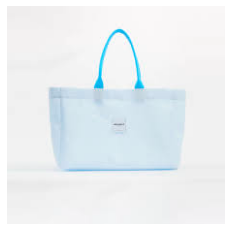

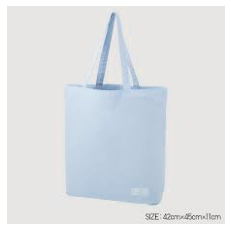

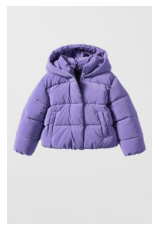

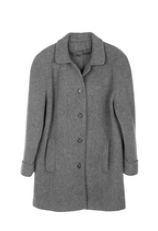

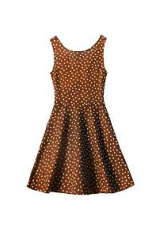

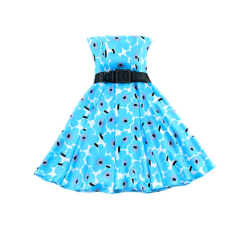

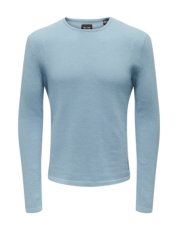

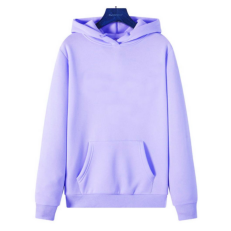

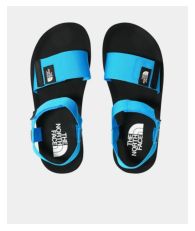

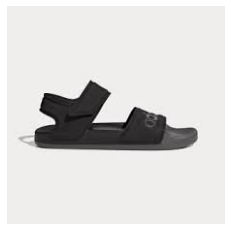

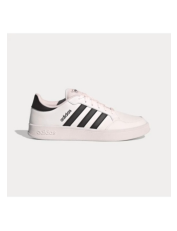

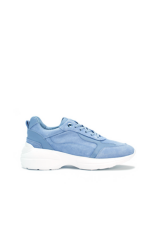

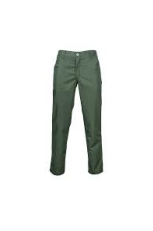

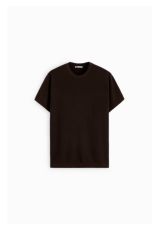

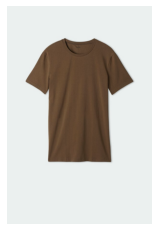

In [13]:
try:
    path = "fashion_images//"
    for filename in os.listdir(path):
        img = cv.imread(path + filename)
        
        plt.imshow(img)
        plt.axis("off")
        plt.show()
except Exception as e:
    print(e)

### Predictions of images we want to guess.

This is probably a trouser


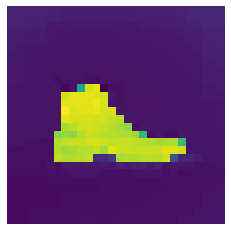

This is probably a ankle_boots


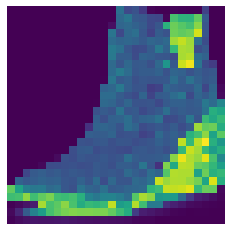

This is probably a bag


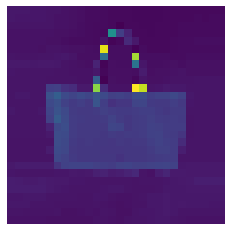

This is probably a t_shirt


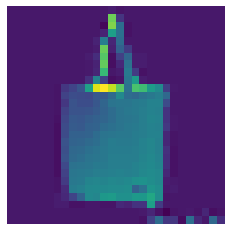

This is probably a t_shirt


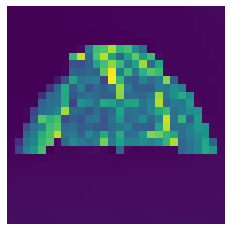

This is probably a coat


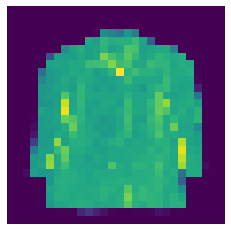

This is probably a t_shirt


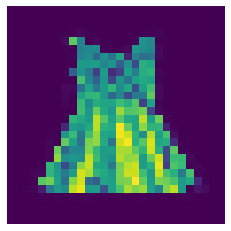

This is probably a t_shirt


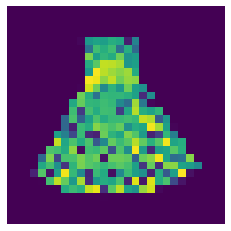

This is probably a coat


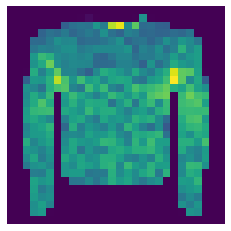

This is probably a pullover


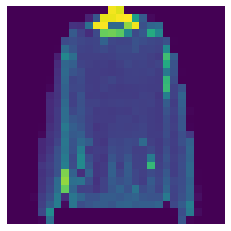

This is probably a t_shirt


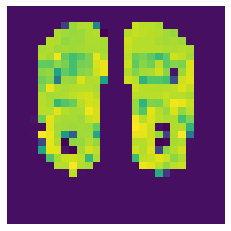

This is probably a bag


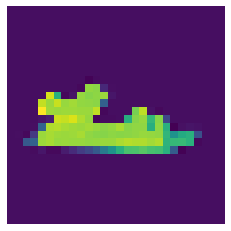

This is probably a bag


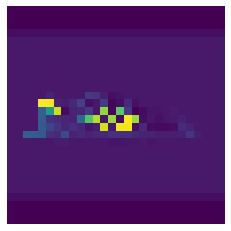

This is probably a t_shirt


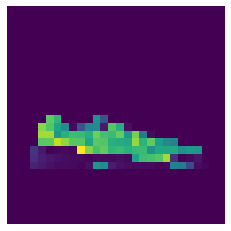

This is probably a t_shirt


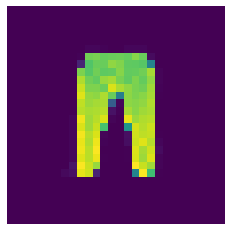

This is probably a t_shirt


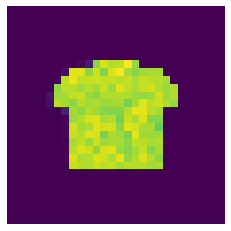

This is probably a t_shirt


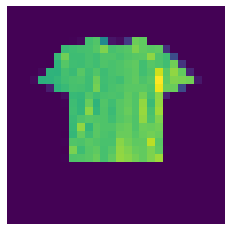

In [14]:
try:
    path = "fashion_images//"
    for filename in os.listdir(path):
        img = cv.imread(path + filename)[:,:,0]
        resize_img = cv.resize(img, (28, 28))
        img = np.invert(np.array([resize_img]))

        prediction = model.predict(img)
        print(f"This is probably a {label[np.argmax(prediction)]}")
        plt.imshow(img[0])
        plt.axis("off")
        plt.show()
except Exception as e:
    print(e)